In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,tata gurgaon gateway,sector 113,3.21,11823.0,2715.0,Super Built up area 2520(234.12 sq.m.),3,3,3,9.0,NaN,New Property,2520.0,NaN,NaN,0,0,0,0,0,1,49,905.000000
1,flat,ambience creacions,sector 22,1.99,15547.0,1280.0,Super Built up area 1380(128.21 sq.m.)Built Up...,2,2,2,9.0,North-East,New Property,1380.0,1285.0,1280.0,0,0,0,0,0,1,49,640.000000
2,flat,shree vardhman flora,sector 90,0.65,6792.0,957.0,Super Built up area 1350(125.42 sq.m.)Built Up...,2,2,3,9.0,South-East,Relatively New,1350.0,1050.0,950.0,1,0,0,0,0,1,67,478.500000
3,flat,ss radiance residency,sector 12,0.60,5660.0,1060.0,Carpet area: 1060 (98.48 sq.m.),3,3,2,3.0,North-East,Relatively New,NaN,NaN,1060.0,0,0,0,0,0,1,44,353.333333
4,flat,pioneer araya,sector 62,7.56,18000.0,4200.0,Built Up area: 4200 (390.19 sq.m.),4,4,3+,23.0,West,Relatively New,NaN,4200.0,NaN,0,1,0,1,0,0,87,1050.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1687
built_up_area          2445
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

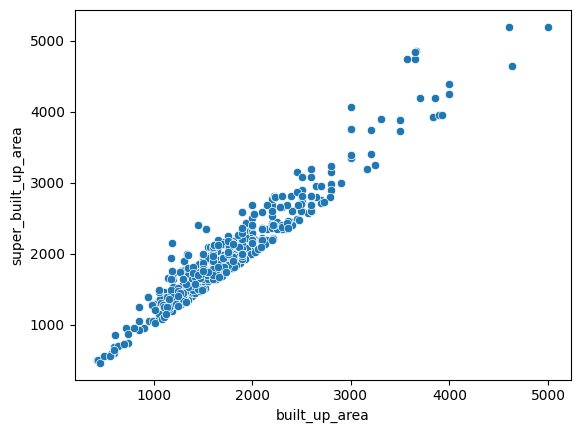

In [7]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])


<Axes: xlabel='built_up_area', ylabel='carpet_area'>

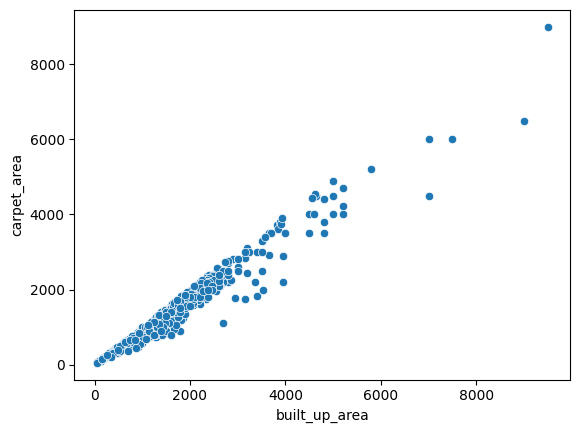

In [8]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'])


In [9]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3551    False
3552    False
3553    False
3554     True
3555    False
Length: 3556, dtype: bool

In [10]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [11]:
all_present_df.shape

(530, 24)

In [12]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1052289815447711 0.900140056022409


In [15]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df.head()


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
26,flat,ild greens,sector 37c,0.95,9223.0,1030.0,Super Built up area 1340(124.49 sq.m.)Carpet a...,2,2,3+,11.0,South-West,Relatively New,1340.0,NaN,1030.00,0,0,1,1,0,0,119,515.000000
29,flat,dlf park place,sector 54,6.75,24963.0,2704.0,Super Built up area 2704(251.21 sq.m.)Carpet a...,4,4,2,8.0,North,Moderately Old,2704.0,NaN,1534.00,0,1,0,0,0,2,135,676.000000
32,flat,puri emerald bay,sector 104,2.65,15006.0,1766.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3,15.0,North-East,Relatively New,2450.0,NaN,1765.73,0,1,0,0,0,0,174,588.666667
37,flat,emaar gurgaon greens,sector 102,1.45,14174.0,1023.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,10.0,North-East,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,1,165,341.000000
59,flat,bestech park view city,sector 48,2.65,10323.0,2567.0,Super Built up area 2567(238.48 sq.m.)Carpet a...,4,4,3+,11.0,North-East,Moderately Old,2567.0,NaN,1750.00,1,1,0,0,0,0,174,641.750000


In [17]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_25108\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\nitis\AppData\Local\Temp\ipykernel_25108\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [18]:
df.update(sbc_df)

In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1687
built_up_area          2026
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [20]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [21]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,tata gurgaon gateway,sector 113,3.21,11823.0,2715.0,Super Built up area 2520(234.12 sq.m.),3,3,3,9.0,NaN,New Property,2520.0,NaN,NaN,0,0,0,0,0,1,49,905.000000
13,flat,central park flower valley aqua front towers,sector 33,2.00,11179.0,1789.0,Super Built up area 1789(166.2 sq.m.),3,3,3+,8.0,North-East,New Property,1789.0,NaN,NaN,0,0,0,0,0,1,23,596.333333
14,flat,puri emerald bay,sector 104,2.49,10163.0,2450.0,Super Built up area 2450(227.61 sq.m.),3,3,3+,14.0,South,Relatively New,2450.0,NaN,NaN,0,1,0,0,0,0,129,816.666667
15,flat,smriti apartment,sector 56,0.45,7500.0,600.0,Super Built up area 600(55.74 sq.m.),1,1,2,3.0,NaN,Old Property,600.0,NaN,NaN,0,0,0,0,0,1,57,600.000000
22,flat,smart world gems,sector 89,1.25,8784.0,1423.0,Super Built up area 1423(132.2 sq.m.),3,3,3,2.0,North,Under Construction,1423.0,NaN,NaN,0,0,0,1,0,1,12,474.333333


In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_25108\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\nitis\AppData\Local\Temp\ipykernel_25108\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(rou

In [23]:
df.update(sb_df)

In [24]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1687
built_up_area          1154
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [25]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,ss radiance residency,sector 12,0.60,5660.0,1060.0,Carpet area: 1060 (98.48 sq.m.),3,3,2,3.0,North-East,Relatively New,NaN,NaN,1060.000000,0,0,0,0,0,1,44,353.333333
7,flat,signature global park,sohna road,0.55,7353.0,748.0,Carpet area: 745 (69.21 sq.m.),2,2,3,4.0,East,New Property,NaN,NaN,745.000000,0,0,0,0,0,1,80,374.000000
11,flat,gls avenue 51,sector 92,0.42,6562.0,640.0,Carpet area: 640 (59.46 sq.m.),3,3,1,2.0,NaN,Relatively New,NaN,NaN,640.000000,0,0,0,0,0,1,20,213.333333
23,flat,pareena laxmi apartments,sector 99a,0.31,5905.0,525.0,Carpet area: 525 (48.77 sq.m.),2,2,2,6.0,East,New Property,NaN,NaN,525.000000,0,0,0,0,0,1,74,262.500000
24,flat,breez global hill view,sohna road,0.35,6318.0,554.0,Carpet area: 554.16 (51.48 sq.m.),2,2,2,14.0,West,New Property,NaN,NaN,554.125572,0,0,0,0,0,1,53,277.000000


In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_25108\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\nitis\AppData\Local\Temp\ipykernel_25108\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carp

In [28]:
df.update(c_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1687
built_up_area           474
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

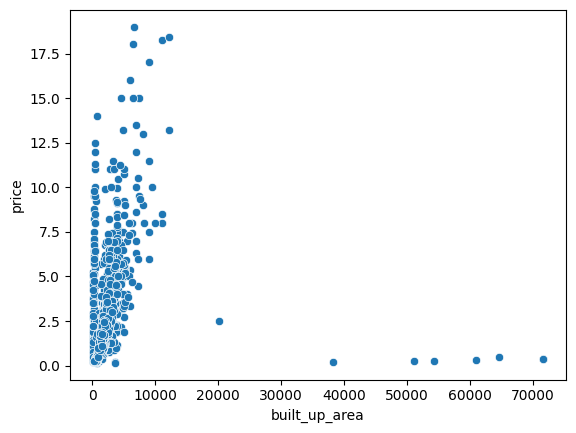

In [31]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])


In [32]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
395,2.80,2441.0,1939.03
1672,2.55,1860.0,1600.00
1741,5.15,3660.0,340.00
640,2.70,1650.0,1833.00
171,3.95,2343.0,1900.00


In [34]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [35]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

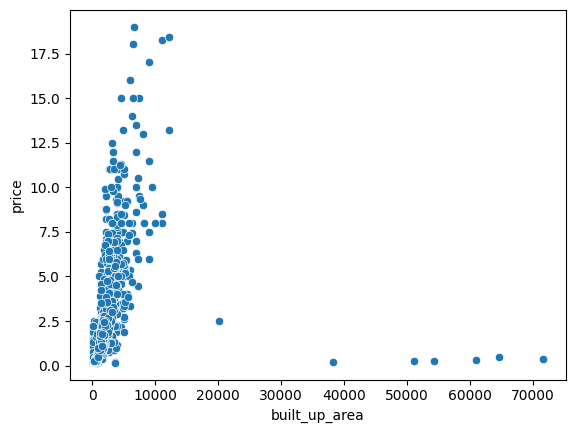

In [37]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])


In [38]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [39]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,tata gurgaon gateway,sector 113,3.21,11823.0,3,3,3,9.0,NaN,New Property,2281.0,0,0,0,0,0,1,49
1,flat,ambience creacions,sector 22,1.99,15547.0,2,2,2,9.0,North-East,New Property,1285.0,0,0,0,0,0,1,49
2,flat,shree vardhman flora,sector 90,0.65,6792.0,2,2,3,9.0,South-East,Relatively New,1050.0,1,0,0,0,0,1,67
3,flat,ss radiance residency,sector 12,0.60,5660.0,3,3,2,3.0,North-East,Relatively New,1178.0,0,0,0,0,0,1,44
4,flat,pioneer araya,sector 62,7.56,18000.0,4,4,3+,23.0,West,Relatively New,4200.0,0,1,0,1,0,0,87


In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1008
agePossession         0
built_up_area       474
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [41]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
12,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,NaN,0,1,1,1,0,1,88
54,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,NaN,0,0,0,0,0,1,21
277,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,0,130
307,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,NaN,1,1,1,1,0,1,0
933,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,1,0
1497,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,1,0
1698,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,NaN,0,0,0,0,0,1,0
2110,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,1,0
2195,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,NaN,0,0,0,0,0,1,9
2309,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,NaN,1,1,1,1,0,2,0


In [42]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [43]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_25108\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [44]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1008
agePossession         0
built_up_area       474
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [45]:
1011/df.shape[0]

0.28430821147356583

### facing

<Axes: ylabel='count'>

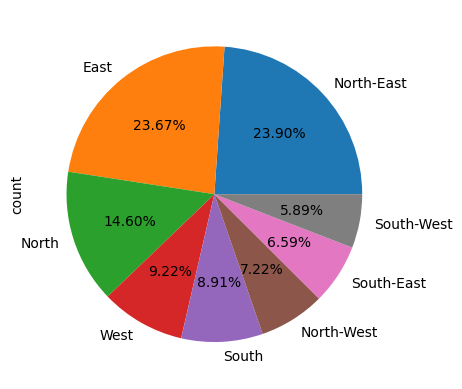

In [46]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [47]:
df.drop(columns=['facing'],inplace=True)

In [48]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1991,flat,tulip violet,sector 69,1.55,9823.0,3,3,2,5.0,Relatively New,1428.0,0,0,0,1,0,1,99
2835,flat,ramprastha the atrium,sector 37d,0.90,6224.0,3,3,2,13.0,Relatively New,1185.0,0,0,0,0,0,2,37
2932,flat,dhoot time residency,sector 63,2.20,12813.0,3,4,3+,8.0,Moderately Old,1554.0,1,0,0,0,0,0,61
3335,flat,imperia elvedor,sector 37c,0.55,8221.0,1,1,0,5.0,Undefined,669.0,0,0,0,0,0,1,0
3137,flat,bptp terra,sector 37d,1.98,9037.0,3,3,3+,12.0,New Property,1983.0,1,0,0,0,0,0,49


In [49]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      474
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [50]:
df.drop(index=[2536],inplace=True)

In [51]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      474
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

### agePossession

In [52]:
df['agePossession'].value_counts()

agePossession
Relatively New        1609
New Property           556
Moderately Old         543
Old Property           292
Undefined              291
Under Construction     264
Name: count, dtype: int64

In [53]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,sare crescent parc,sector 92,0.82,5384.0,3,3,3+,12.0,Undefined,1523.0,0,0,0,0,0,1,0
8,flat,south city 1 floors,sector 41,3.40,11724.0,4,4,3,0.0,Undefined,2900.0,0,0,0,0,0,1,0
18,flat,avl 36 gurgaon,sector 36a,0.50,8333.0,1,1,1,5.0,Undefined,600.0,0,0,0,0,0,1,0
28,flat,lavanya apartments,sector 81,0.90,5056.0,3,3,0,7.0,Undefined,1780.0,0,0,0,0,0,1,0
48,flat,sare green parc,sector 92,0.85,6538.0,3,2,2,20.0,Undefined,1300.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,flat,godrej air,sector 85,1.40,10000.0,2,2,3,23.0,Undefined,1400.0,0,0,0,0,0,1,44
3541,flat,signature global solera,sector 107,0.25,7862.0,1,1,0,0.0,Undefined,318.0,0,0,0,0,0,1,55
3548,house,independent,sector 41,1.65,13750.0,1,1,0,1.0,Undefined,1200.0,0,0,0,0,0,1,0
3551,house,independent,sector 1,1.85,16003.0,4,3,2,3.0,Undefined,1284.0,0,0,0,0,0,1,0


In [54]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [55]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1732
New Property           585
Moderately Old         581
Old Property           324
Under Construction     278
Undefined               55
Name: count, dtype: int64

In [57]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [58]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [59]:
df['agePossession'].value_counts()

agePossession
Relatively New        1743
Moderately Old         588
New Property           586
Old Property           327
Under Construction     278
Undefined               33
Name: count, dtype: int64

In [60]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [62]:
df['agePossession'].value_counts()


agePossession
Relatively New        1745
Moderately Old         619
New Property           586
Old Property           327
Under Construction     278
Name: count, dtype: int64

In [63]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      474
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [64]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [65]:
df.shape

(3555, 18)